In [18]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
#reading csv file and storing in df  
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### Deleting column Unnamed: 0 as it seems to be serail number

In [20]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### checking nulls

In [21]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

no null present 

#### checking datatype

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


all are numerical datatype

#### checking how the data is defined statistically

In [23]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


a large amount of money is spend on TV advertisement

#### Univariate analysis

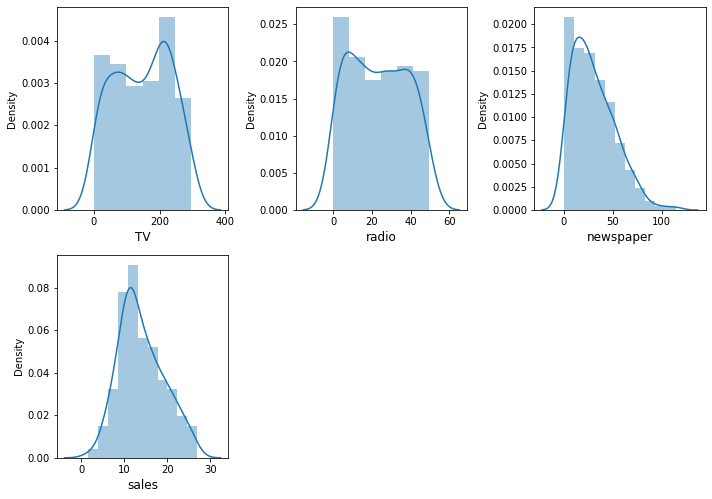

In [24]:
# plotting distribution graph 
j=0
plt.figure(figsize=(10,10))
for column in df:
    plt.subplot(3,3,j+1)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

- Spending on TV is more compared to other sources
- TV 
    - skewness presence is less
    - outliers presence is not very significant
    - Range is from 0.07-300
    - most common amount alloted for advertisment being about 220
- Radio 
    - appears to be uniformly distributed
    - very little skewness
    - range is from 0-50, where 0 means that there was no investment in radio
    - The most common amount invested for radio is around 15 and 40
- Newspaper
    - appears to be positively skewed
    - range is from 0-100,where 0 means that there was no investment in newspaper
    - presence of outliers
    - the most common amount spend is 25
    

#### Bivariate analysis

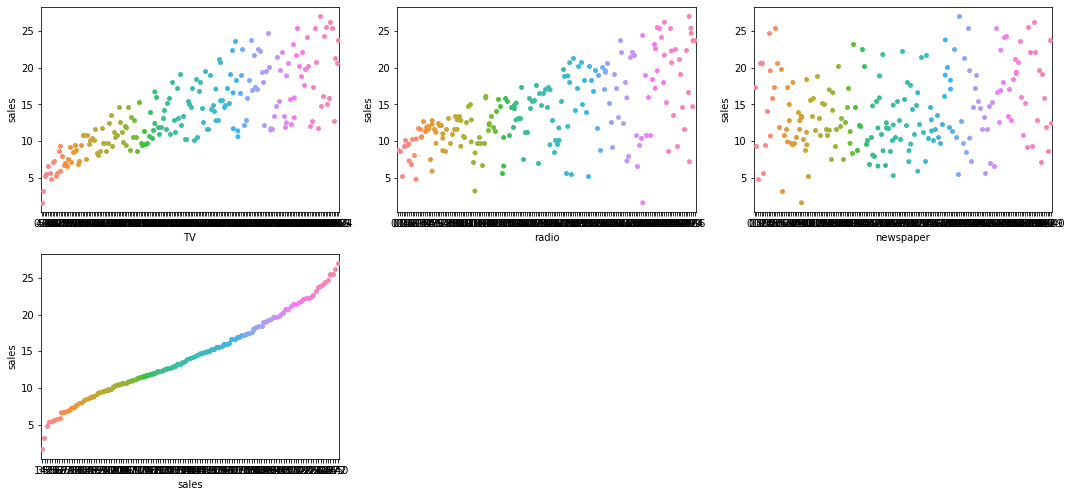

In [25]:
#plotting stripplot between sales and other features and seeing their relationship 
j=0
plt.figure(figsize=(15,10))
for column in df:
    plt.subplot(3,3,j+1)
    sns.stripplot(x=df[column],y=df['sales'],data=df)
    j+=1
plt.tight_layout() 

- TV and Sales seems to have strong positive correlation as the TV adv cost increases sales increases
- Radio and Sales seems to have some correaltion as radio cost increases sales also increases
- Newspaper and Sales doesnt seem to have much correlation which can is later verified

#### check skewness

In [26]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

the newspaper has high skewness greater than acceptable limit of 0.65

In [27]:
#using power transform to transform and normalize the dataset and storing it in A and copying it to df
from sklearn.preprocessing import power_transform
B=df.drop('sales',axis=1).copy()
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[B.columns]=A.copy()
df

,TV,radio,newspaper,sales
0,0.948674,0.962247,1.514335,22.1
1,-1.191314,1.040179,0.787683,10.4
2,-1.647757,1.370710,1.516998,9.3
3,0.141020,1.142387,1.214656,18.5
4,0.452715,-0.748651,1.211704,12.9
...,...,...,...,...
195,-1.287908,-1.431436,-0.682576,7.6
196,-0.520949,-1.297017,-1.142011,9.7
197,0.413091,-0.875492,-1.313050,12.8
198,1.455843,1.177722,1.433350,25.5


In [28]:
#ckecking if skewness is within the limits
df.skew()

TV          -0.315199
radio       -0.242968
newspaper   -0.077942
sales        0.407571
dtype: float64

the value of skewness is within the acceptable limits of 0.65 to -0.65

#### checking correlation

In [30]:
df.corr()["sales"].sort_values()

newspaper    0.198977
radio        0.570964
TV           0.788695
sales        1.000000
Name: sales, dtype: float64

newspaper has the least correlation to sales and TV has the highest 

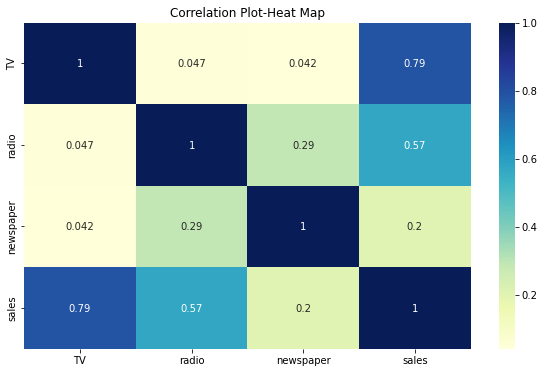

In [31]:
#plotting heatmap to see the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

- feature to feature correlation is not very high
- the highest correlation value is between radio and newspaper 0.29

In [33]:
#checking for multicollinearity by using vif
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop('sales',axis=1)
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,7.293750,TV
1,4.142946,radio
2,1.095417,newspaper


all the vif values are less than 10 within the acceptable limits

#### Removing outliers using z score

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  0.0  %


#### spliting data

In [35]:
X=df_x.drop(['sales'],axis=1)
Y=df_x['sales']

#### Trying differnent algorithm

In [36]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[] 
B=[] 
C=[] 
D=[] 
mae=[] 

In [37]:
#loop used to find the best random state
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=(r2_score(y_test,y_pred))*100
        print("r2 score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [38]:
# used to get test accuracy, train accuracy, mse, mae
def te_t(regr,x_train,x_test,y_train,y_test,R):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(r2_score(y_test,y_te)*100,1)}")
    A.append(round(r2_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(r2_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))

In [39]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test,R):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(r2_score(y_train,y_tr)*100,1)
    te_ac=round(r2_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)

In [40]:
from sklearn.tree import DecisionTreeRegressor
reg= DecisionTreeRegressor()
R=maxr2_score(reg,X,Y)

r2 score corresponding to  0  is  94.88472051559539
r2 score corresponding to  1  is  97.05774577698696
r2 score corresponding to  2  is  96.38251535630978
r2 score corresponding to  3  is  95.89946590543418
r2 score corresponding to  4  is  96.60642259264881
r2 score corresponding to  5  is  95.38883784179293
r2 score corresponding to  6  is  89.5057232432728
r2 score corresponding to  7  is  94.89795918367346
r2 score corresponding to  8  is  92.49708546798293
r2 score corresponding to  9  is  95.31044143381988
r2 score corresponding to  10  is  95.87526595397527
r2 score corresponding to  11  is  95.50435936372159
r2 score corresponding to  12  is  96.02692027653816
r2 score corresponding to  13  is  95.84449126060089
r2 score corresponding to  14  is  95.07806638217788
r2 score corresponding to  15  is  96.90585224558743
r2 score corresponding to  16  is  95.8880162922352
r2 score corresponding to  17  is  96.8716071353921
r2 score corresponding to  18  is  93.8030867419569
r2 scor

In [41]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test,R)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test,R)

test accuracy is 97.2
train accuracy is 100.0


At cv is 2 cv score is 93.36  
 test accuracy is 97.2 

At cv is 3 cv score is 95.06  
 test accuracy is 97.2 

At cv is 4 cv score is 93.84  
 test accuracy is 97.2 

At cv is 5 cv score is 95.33  
 test accuracy is 97.2 

At cv is 6 cv score is 94.88  
 test accuracy is 97.2 

At cv is 7 cv score is 95.13  
 test accuracy is 97.2 

At cv is 8 cv score is 94.24  
 test accuracy is 97.2 

At cv is 9 cv score is 94.71  
 test accuracy is 97.2 

At cv is 10 cv score is 95.1  
 test accuracy is 97.2 

At cv is 11 cv score is 94.64  
 test accuracy is 97.2 

At cv is 12 cv score is 94.17  
 test accuracy is 97.2 

At cv is 13 cv score is 94.56  
 test accuracy is 97.2 

At cv is 14 cv score is 94.28  
 test accuracy is 97.2 

At cv is 15 cv score is 94.14  
 test accuracy is 97.2 

At cv is 16 cv score is 95.43  
 test accuracy is 97.2 

At cv is 17 cv score is 93.09  
 test accuracy is 97.2 

At cv is 18 cv score is 94.14  
 test accuracy is

In [42]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor()
R=maxr2_score(rf_reg,X,Y)

r2 score corresponding to  0  is  96.88388748530072
r2 score corresponding to  1  is  97.63458117798518
r2 score corresponding to  2  is  97.51513755155639
r2 score corresponding to  3  is  98.18293112677927
r2 score corresponding to  4  is  97.50903357007797
r2 score corresponding to  5  is  98.70395074657623
r2 score corresponding to  6  is  97.74795280150418
r2 score corresponding to  7  is  98.15192259717243
r2 score corresponding to  8  is  97.12115673943192
r2 score corresponding to  9  is  98.14249927643556
r2 score corresponding to  10  is  97.73294260461753
r2 score corresponding to  11  is  97.48609339012037
r2 score corresponding to  12  is  98.4104603193228
r2 score corresponding to  13  is  97.49098436717479
r2 score corresponding to  14  is  96.03472458139456
r2 score corresponding to  15  is  97.79913708875534
r2 score corresponding to  16  is  97.91220649878318
r2 score corresponding to  17  is  97.1097108935962
r2 score corresponding to  18  is  95.38906042398216
r2 sc

In [43]:

x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_reg,x2_train,x2_test,y2_train,y2_test,R)
print('\n')
score(rf_reg,x2_train,x2_test,y2_train,y2_test,R)

test accuracy is 98.7
train accuracy is 99.6


At cv is 2 cv score is 97.2  
 test accuracy is 98.7 

At cv is 3 cv score is 97.18  
 test accuracy is 98.7 

At cv is 4 cv score is 97.8  
 test accuracy is 98.7 

At cv is 5 cv score is 97.44  
 test accuracy is 98.7 

At cv is 6 cv score is 97.73  
 test accuracy is 98.7 

At cv is 7 cv score is 97.73  
 test accuracy is 98.7 

At cv is 8 cv score is 97.64  
 test accuracy is 98.7 

At cv is 9 cv score is 97.61  
 test accuracy is 98.7 

At cv is 10 cv score is 97.98  
 test accuracy is 98.7 

At cv is 11 cv score is 97.64  
 test accuracy is 98.7 

At cv is 12 cv score is 97.73  
 test accuracy is 98.7 

At cv is 13 cv score is 97.77  
 test accuracy is 98.7 

At cv is 14 cv score is 97.77  
 test accuracy is 98.7 

At cv is 15 cv score is 97.7  
 test accuracy is 98.7 

At cv is 16 cv score is 97.75  
 test accuracy is 98.7 

At cv is 17 cv score is 97.62  
 test accuracy is 98.7 

At cv is 18 cv score is 97.51  
 test accuracy is 98

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knr = KNeighborsRegressor()
R=maxr2_score(knr,X,Y)

r2 score corresponding to  0  is  92.81455364141922
r2 score corresponding to  1  is  95.73854988995149
r2 score corresponding to  2  is  93.12311862705153
r2 score corresponding to  3  is  93.81599453328796
r2 score corresponding to  4  is  93.3141164624842
r2 score corresponding to  5  is  96.71834977735612
r2 score corresponding to  6  is  93.28441959870558
r2 score corresponding to  7  is  95.09142901824112
r2 score corresponding to  8  is  90.2226452898667
r2 score corresponding to  9  is  94.85987918056294
r2 score corresponding to  10  is  90.97447993568731
r2 score corresponding to  11  is  90.68554775831963
r2 score corresponding to  12  is  96.07000017872254
r2 score corresponding to  13  is  93.40254214488817
r2 score corresponding to  14  is  92.38098995376144
r2 score corresponding to  15  is  94.69561173844413
r2 score corresponding to  16  is  94.03480156813305
r2 score corresponding to  17  is  91.89881932790674
r2 score corresponding to  18  is  90.52197020024676
r2 sc

In [45]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(knr,x3_train,x3_test,y3_train,y3_test,R)
print('\n')
score(knr,x3_train,x3_test,y3_train,y3_test,R)

test accuracy is 97.0
train accuracy is 95.9


At cv is 2 cv score is 92.79  
 test accuracy is 97.0 

At cv is 3 cv score is 93.29  
 test accuracy is 97.0 

At cv is 4 cv score is 94.49  
 test accuracy is 97.0 

At cv is 5 cv score is 94.38  
 test accuracy is 97.0 

At cv is 6 cv score is 93.9  
 test accuracy is 97.0 

At cv is 7 cv score is 94.26  
 test accuracy is 97.0 

At cv is 8 cv score is 94.0  
 test accuracy is 97.0 

At cv is 9 cv score is 93.66  
 test accuracy is 97.0 

At cv is 10 cv score is 94.72  
 test accuracy is 97.0 

At cv is 11 cv score is 94.24  
 test accuracy is 97.0 

At cv is 12 cv score is 94.08  
 test accuracy is 97.0 

At cv is 13 cv score is 94.33  
 test accuracy is 97.0 

At cv is 14 cv score is 93.97  
 test accuracy is 97.0 

At cv is 15 cv score is 93.67  
 test accuracy is 97.0 

At cv is 16 cv score is 94.17  
 test accuracy is 97.0 

At cv is 17 cv score is 94.19  
 test accuracy is 97.0 

At cv is 18 cv score is 94.27  
 test accuracy is 9

In [46]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
R=maxr2_score(lnr,X,Y)

r2 score corresponding to  0  is  88.38865502815021
r2 score corresponding to  1  is  89.62223515318661
r2 score corresponding to  2  is  81.34661880809733
r2 score corresponding to  3  is  91.76823268482114
r2 score corresponding to  4  is  89.99332568068064
r2 score corresponding to  5  is  91.11155103873196
r2 score corresponding to  6  is  92.63228920019166
r2 score corresponding to  7  is  92.29594391045336
r2 score corresponding to  8  is  86.78974095570129
r2 score corresponding to  9  is  93.18076821551766
r2 score corresponding to  10  is  86.57541622711325
r2 score corresponding to  11  is  88.03200845985654
r2 score corresponding to  12  is  91.94470983657713
r2 score corresponding to  13  is  93.9589889787954
r2 score corresponding to  14  is  88.55915841915028
r2 score corresponding to  15  is  89.27492990332131
r2 score corresponding to  16  is  93.94773289601727
r2 score corresponding to  17  is  87.04482295852985
r2 score corresponding to  18  is  88.52485991092028
r2 s

In [47]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(lnr,x4_train,x4_test,y4_train,y4_test,R)
print('\n')
score(lnr,x4_train,x4_test,y4_train,y4_test,R)

test accuracy is 94.3
train accuracy is 89.5


At cv is 2 cv score is 90.42  
 test accuracy is 94.3 

At cv is 3 cv score is 90.05  
 test accuracy is 94.3 

At cv is 4 cv score is 90.11  
 test accuracy is 94.3 

At cv is 5 cv score is 89.78  
 test accuracy is 94.3 

At cv is 6 cv score is 90.2  
 test accuracy is 94.3 

At cv is 7 cv score is 89.82  
 test accuracy is 94.3 

At cv is 8 cv score is 89.58  
 test accuracy is 94.3 

At cv is 9 cv score is 89.59  
 test accuracy is 94.3 

At cv is 10 cv score is 89.67  
 test accuracy is 94.3 

At cv is 11 cv score is 88.91  
 test accuracy is 94.3 

At cv is 12 cv score is 89.64  
 test accuracy is 94.3 

At cv is 13 cv score is 89.78  
 test accuracy is 94.3 

At cv is 14 cv score is 88.83  
 test accuracy is 94.3 

At cv is 15 cv score is 88.83  
 test accuracy is 94.3 

At cv is 16 cv score is 89.39  
 test accuracy is 94.3 

At cv is 17 cv score is 87.92  
 test accuracy is 94.3 

At cv is 18 cv score is 89.31  
 test accuracy is 

In [48]:
from sklearn.ensemble import AdaBoostRegressor
adboost_reg= AdaBoostRegressor()
R=maxr2_score(adboost_reg,X,Y)

r2 score corresponding to  0  is  95.36915519741129
r2 score corresponding to  1  is  96.72432192563713
r2 score corresponding to  2  is  94.31385752362557
r2 score corresponding to  3  is  95.28487007825277
r2 score corresponding to  4  is  95.4216238781083
r2 score corresponding to  5  is  96.26761162619226
r2 score corresponding to  6  is  95.79264913067729
r2 score corresponding to  7  is  95.98410549732863
r2 score corresponding to  8  is  95.20547856648463
r2 score corresponding to  9  is  95.2660121737965
r2 score corresponding to  10  is  96.7796537599867
r2 score corresponding to  11  is  95.48290072732743
r2 score corresponding to  12  is  96.88838175176609
r2 score corresponding to  13  is  95.29664104923282
r2 score corresponding to  14  is  94.74409037125291
r2 score corresponding to  15  is  95.3503475251248
r2 score corresponding to  16  is  95.67184700647121
r2 score corresponding to  17  is  94.8489760455933
r2 score corresponding to  18  is  93.64993764802993
r2 score

In [49]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)
print('\n')
score(adboost_reg,x5_train,x5_test,y5_train,y5_test,R)

test accuracy is 96.8
train accuracy is 97.8


At cv is 2 cv score is 95.55  
 test accuracy is 96.8 

At cv is 3 cv score is 95.39  
 test accuracy is 96.8 

At cv is 4 cv score is 95.67  
 test accuracy is 96.8 

At cv is 5 cv score is 95.25  
 test accuracy is 96.8 

At cv is 6 cv score is 95.46  
 test accuracy is 96.8 

At cv is 7 cv score is 95.56  
 test accuracy is 96.8 

At cv is 8 cv score is 95.39  
 test accuracy is 96.8 

At cv is 9 cv score is 94.92  
 test accuracy is 96.8 

At cv is 10 cv score is 95.57  
 test accuracy is 96.8 

At cv is 11 cv score is 95.28  
 test accuracy is 96.8 

At cv is 12 cv score is 95.37  
 test accuracy is 96.8 

At cv is 13 cv score is 95.46  
 test accuracy is 96.8 

At cv is 14 cv score is 95.31  
 test accuracy is 96.8 

At cv is 15 cv score is 95.5  
 test accuracy is 96.8 

At cv is 16 cv score is 95.23  
 test accuracy is 96.8 

At cv is 17 cv score is 94.79  
 test accuracy is 96.8 

At cv is 18 cv score is 94.84  
 test accuracy is 

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg=GradientBoostingRegressor()
R=maxr2_score(grad_reg,X,Y)

r2 score corresponding to  0  is  96.79504641757264
r2 score corresponding to  1  is  97.62773462479268
r2 score corresponding to  2  is  97.54082681962338
r2 score corresponding to  3  is  98.25383070296049
r2 score corresponding to  4  is  97.97395355127205
r2 score corresponding to  5  is  98.29229514660165
r2 score corresponding to  6  is  97.76268274234859
r2 score corresponding to  7  is  98.3716691122244
r2 score corresponding to  8  is  96.85726273077296
r2 score corresponding to  9  is  97.5021072028794
r2 score corresponding to  10  is  97.47368695932607
r2 score corresponding to  11  is  97.4230380834893
r2 score corresponding to  12  is  98.57940506974704
r2 score corresponding to  13  is  97.97566593902096
r2 score corresponding to  14  is  96.19893485989007
r2 score corresponding to  15  is  98.73110541230561
r2 score corresponding to  16  is  97.94354424448542
r2 score corresponding to  17  is  96.60540504962842
r2 score corresponding to  18  is  95.57128162270824
r2 sco

In [51]:
x6_train,x6_test,y6_train,y6_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_reg,x6_train,x6_test,y6_train,y6_test,R)
print('\n')
score(grad_reg,x6_train,x6_test,y6_train,y6_test,R)

test accuracy is 99.1
train accuracy is 99.9


At cv is 2 cv score is 97.41  
 test accuracy is 99.1 

At cv is 3 cv score is 97.84  
 test accuracy is 99.1 

At cv is 4 cv score is 97.95  
 test accuracy is 99.1 

At cv is 5 cv score is 97.77  
 test accuracy is 99.1 

At cv is 6 cv score is 97.8  
 test accuracy is 99.1 

At cv is 7 cv score is 97.7  
 test accuracy is 99.1 

At cv is 8 cv score is 97.97  
 test accuracy is 99.1 

At cv is 9 cv score is 97.65  
 test accuracy is 99.1 

At cv is 10 cv score is 98.13  
 test accuracy is 99.1 

At cv is 11 cv score is 98.0  
 test accuracy is 99.1 

At cv is 12 cv score is 97.71  
 test accuracy is 99.1 

At cv is 13 cv score is 97.96  
 test accuracy is 99.1 

At cv is 14 cv score is 97.89  
 test accuracy is 99.1 

At cv is 15 cv score is 97.95  
 test accuracy is 99.1 

At cv is 16 cv score is 98.01  
 test accuracy is 99.1 

At cv is 17 cv score is 97.97  
 test accuracy is 99.1 

At cv is 18 cv score is 97.91  
 test accuracy is 99

In [52]:
from sklearn.svm import SVR
svr_reg=SVR()
R=maxr2_score(svr_reg,X,Y)

r2 score corresponding to  0  is  90.24111956069574
r2 score corresponding to  1  is  96.51108971181078
r2 score corresponding to  2  is  91.63248881581868
r2 score corresponding to  3  is  89.00058337020826
r2 score corresponding to  4  is  91.83454487620118
r2 score corresponding to  5  is  96.56004114812782
r2 score corresponding to  6  is  94.17623196326521
r2 score corresponding to  7  is  89.53331317686194
r2 score corresponding to  8  is  85.54840496026743
r2 score corresponding to  9  is  93.84076951105565
r2 score corresponding to  10  is  89.85813434572825
r2 score corresponding to  11  is  88.4172707369305
r2 score corresponding to  12  is  89.15462754255822
r2 score corresponding to  13  is  86.54198765177883
r2 score corresponding to  14  is  89.87601642433796
r2 score corresponding to  15  is  93.14526964206323
r2 score corresponding to  16  is  95.45644362962959
r2 score corresponding to  17  is  90.36252893957058
r2 score corresponding to  18  is  88.64078178170793
r2 s

In [53]:
x7_train,x7_test,y7_train,y7_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svr_reg,x7_train,x7_test,y7_train,y7_test,R)
print('\n')
score(svr_reg,x7_train,x7_test,y7_train,y7_test,R)

test accuracy is 98.6
train accuracy is 93.4


At cv is 2 cv score is 86.61  
 test accuracy is 98.6 

At cv is 3 cv score is 90.36  
 test accuracy is 98.6 

At cv is 4 cv score is 91.35  
 test accuracy is 98.6 

At cv is 5 cv score is 91.71  
 test accuracy is 98.6 

At cv is 6 cv score is 92.3  
 test accuracy is 98.6 

At cv is 7 cv score is 91.93  
 test accuracy is 98.6 

At cv is 8 cv score is 91.88  
 test accuracy is 98.6 

At cv is 9 cv score is 92.04  
 test accuracy is 98.6 

At cv is 10 cv score is 92.68  
 test accuracy is 98.6 

At cv is 11 cv score is 92.55  
 test accuracy is 98.6 

At cv is 12 cv score is 92.15  
 test accuracy is 98.6 

At cv is 13 cv score is 92.52  
 test accuracy is 98.6 

At cv is 14 cv score is 92.27  
 test accuracy is 98.6 

At cv is 15 cv score is 92.52  
 test accuracy is 98.6 

At cv is 16 cv score is 92.44  
 test accuracy is 98.6 

At cv is 17 cv score is 92.53  
 test accuracy is 98.6 

At cv is 18 cv score is 93.23  
 test accuracy is 

In [54]:
import xgboost as xgb
xgb=xgb.XGBRegressor()
R=maxr2_score(xgb,X,Y)

r2 score corresponding to  0  is  97.56668236314032
r2 score corresponding to  1  is  97.16030998572931
r2 score corresponding to  2  is  97.71385600403923
r2 score corresponding to  3  is  97.52784894974886
r2 score corresponding to  4  is  97.60581147923253
r2 score corresponding to  5  is  97.77376454380759
r2 score corresponding to  6  is  97.3237309343874
r2 score corresponding to  7  is  97.91147668909149
r2 score corresponding to  8  is  97.14015530648663
r2 score corresponding to  9  is  96.68423979824271
r2 score corresponding to  10  is  97.92626631581318
r2 score corresponding to  11  is  97.11159094458802
r2 score corresponding to  12  is  97.70038276309873
r2 score corresponding to  13  is  96.83472726173893
r2 score corresponding to  14  is  96.51976213335479
r2 score corresponding to  15  is  98.12701871242156
r2 score corresponding to  16  is  97.0490958786537
r2 score corresponding to  17  is  96.87406677974795
r2 score corresponding to  18  is  94.57989972476165
r2 sc

In [55]:
x8_train,x8_test,y8_train,y8_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(xgb,x8_train,x8_test,y8_train,y8_test,R)
print('\n')
score(xgb,x8_train,x8_test,y8_train,y8_test,R)

test accuracy is 98.7
train accuracy is 100.0


At cv is 2 cv score is 96.9  
 test accuracy is 98.7 

At cv is 3 cv score is 96.71  
 test accuracy is 98.7 

At cv is 4 cv score is 97.11  
 test accuracy is 98.7 

At cv is 5 cv score is 96.56  
 test accuracy is 98.7 

At cv is 6 cv score is 96.97  
 test accuracy is 98.7 

At cv is 7 cv score is 96.78  
 test accuracy is 98.7 

At cv is 8 cv score is 97.48  
 test accuracy is 98.7 

At cv is 9 cv score is 96.98  
 test accuracy is 98.7 

At cv is 10 cv score is 97.53  
 test accuracy is 98.7 

At cv is 11 cv score is 96.73  
 test accuracy is 98.7 

At cv is 12 cv score is 96.92  
 test accuracy is 98.7 

At cv is 13 cv score is 97.44  
 test accuracy is 98.7 

At cv is 14 cv score is 97.27  
 test accuracy is 98.7 

At cv is 15 cv score is 97.48  
 test accuracy is 98.7 

At cv is 16 cv score is 97.24  
 test accuracy is 98.7 

At cv is 17 cv score is 97.52  
 test accuracy is 98.7 

At cv is 18 cv score is 97.21  
 test accuracy is

#### Creating Table to view data

In [56]:
L=['DT','RF','KNN','LR','ADA','GRAD','SVR','XGB']

In [57]:
E=pd.DataFrame({'test accuracy':A,'cv_score': B,'diff':D,'mse':C,'mae':mae},index=L)
E

,test accuracy,cv_score,diff,mse,mae
DT,97.2,95.428585,1.771415,0.815250,0.667500
RF,98.7,97.980590,0.719410,0.353798,0.458925
KNN,97.0,94.723411,2.276589,0.617680,0.614000
LR,94.3,90.422452,3.877548,1.852154,1.067320
ADA,96.8,95.670402,1.129598,0.848523,0.733933
GRAD,99.1,98.134046,0.965954,0.252120,0.388838
SVR,98.6,93.229366,5.370634,0.254973,0.379575
XGB,98.7,97.527716,1.172284,0.478733,0.546078


#### Inference

Gradient boosting is the best model 
- has the highest test accuracy 
- has the highest cv_score
- has the second least difference between cv_score and test accuracy
- has the least error ie mse and mae value is the least compared to other model

based on these concluded that gradient boosting is the best model

#### Hyper paramter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [120]:
par={'loss':[ 'squared_error', 'absolute_error'],
     'learning_rate':[0.01,0.05,0.08,0.09,0.095,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.8,1,10],
     'criterion':['friedman_mse','mse'],
     'n_estimators':[10,50,100,150,200,250,300,350,370,390,400],
     'max_features' : ['auto', 'sqrt', 'log2']
}

In [121]:
grid=GridSearchCV(grad_reg,par,cv=2)
grid.fit(x6_train,y6_train)
grid.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_features': 'auto',
 'n_estimators': 400}

In [128]:
grad=GradientBoostingRegressor( criterion= 'mse', learning_rate= 0.1, loss= 'absolute_error', max_features= 'auto', n_estimators= 400)
grad.fit(x6_train,y6_train)
y_te=grad.predict(x6_test)
r2=round(r2_score(y6_test,y_te)*100,2)
print(r2)

97.92


In [129]:
cv_score=cross_val_score(grad,X,Y,cv=2)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

97.78


#### Storing model and loading it

In [208]:
import pickle

In [209]:
filename='adv_sales_channel.pkl'
pickle.dump(grad,open(filename,'wb'))

In [211]:
l_m=pickle.load(open('adv_sales_channel.pkl','rb'))
re=l_m.score(x6_test,y6_test)
print(re*100)

97.92167698482528
